# ОИАД. Лабораторная работа №1

Используйте набор данных 'datasets/teen_phone_addiction_dataset.csv'.


In [54]:
import pandas as pd
import numpy as np 

dataset  = pd.read_csv('../datasets/teen_phone_addiction_dataset.csv')

Возьмите столбец $N \% 7 $, где $N$ - номер в списке группы (см. ниже).

In [55]:
N = 12
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
col_name = cols[N % 7]

data = np.array(dataset[col_name])

data

array([1.7, 4. , 1.5, ..., 0.2, 2.6, 2.3], shape=(3000,))

# Вспомогательные функции

In [56]:
from scipy import stats

In [57]:
import matplotlib.pyplot as plt 

def histogram(data,ax=plt):
    bins_cnt = 1 + int(np.log2(len(data)))
    ax.hist(data, bins = bins_cnt, edgecolor='black', color='green')

In [58]:
def emp_dist_func(data):
    def func(x):
        return np.sum(data <= x) / len(data)
    return np.vectorize(func)

def draw_emp_dist_func(data, cnt = 100, ax = plt):
    step = (np.max(data) - np.min(data)) / cnt
    args = np.linspace(np.min(data) - step, np.max(data) + step, cnt)
    func = emp_dist_func(data)
    ax.plot(args, func(args), 'o')


In [59]:
from scipy.stats import norm, chi2

def pearson(data):
    N = len(data)
    bcnt = 1 + int(np.log2(N))

    counts, bins = np.histogram(data, bins=bcnt)
    intervals = np.column_stack((bins[:-1],bins[1:]))
    mean = np.mean(data)
    std = np.sqrt(np.var(data))

    cdf = np.vectorize(lambda x: norm.cdf(x, loc=mean, scale=std))
    cdfs = cdf(intervals)
    probs = cdfs[:, 1] - cdfs[:, 0]

    freqs = counts 
    es = N * probs

    value = np.sum(((freqs - es) ** 2 )/es)
    
    
    df = len(counts) - 3
    alpha = 0.05
    critical_value = chi2.ppf(1 - alpha, df)
    if value > critical_value:
        return "Not normal!"
    else:
        return "Maybe, normal..."


test_data = np.random.normal(size=100)
pearson(test_data)

'Maybe, normal...'

In [60]:
def assymetry(data):
    N = len(data)
    asymm = stats.moment(data, moment=3)/ (stats.moment(data, moment=2) ** 1.5)
    se = np.sqrt(6 / N)
    value = asymm / se 
    alpha = 0.05
    critical_value = norm.ppf(1 - alpha /2)
    if abs(value) > critical_value:
        return "Not normal!"
    else:
        return "Maybe, normal..."

test_data = np.random.normal(loc = 1, scale = 5, size=100)
assymetry(test_data)

'Maybe, normal...'

In [61]:
def kurtosis(data):
    N = len(data)
    exc_kurt = stats.moment(data, moment=4)/ (stats.moment(data, moment=2) ** 2) - 3 
    se = np.sqrt(24 / N)
    value = exc_kurt / se 
    alpha = 0.05
    critical_value = norm.ppf(1 - alpha /2)
    if abs(value) > critical_value:
        return "Not normal!"
    else:
        return "Maybe, normal..."

test_data = np.random.normal(loc=-9, scale=88, size=100)
kurtosis(test_data)

kurtosis(data)

'Not normal!'

In [120]:
def q_q_plot(data, ax=plt):
    stats.probplot(data, dist="norm", plot=ax)
    ax.grid(True, alpha=0.3)

In [121]:
import pandas as pd
import base64
from io import BytesIO
from IPython.display import HTML

def plot_image(fig):
    buf = BytesIO()
    plt.savefig(buf, format="png", bbox_inches="tight")
    plt.close(fig)
    buf.seek(0)
    b64 = base64.b64encode(buf.read()).decode("utf-8")
    return f"<img src='data:image/png;base64,{b64}' />"

def goals_1_2(data):
    res_dict = {}
    res_dict['mean'] = np.mean(data)
    res_dict['var'] = np.var(data)


    values, counts = np.unique(data, return_counts=True)
    mod_cnt = np.argmax(counts)
    res_dict['mod'] = values[mod_cnt]

    res_dict['med'] = np.median(data)
    res_dict['quantiles of level 0.25, 0.5, 0.75'] =  (
        np.quantile(data, 0.25), 
        np.quantile(data, 0.5), 
        np.quantile(data, 0.75)
    )

    res_dict['exc_kurt'] = stats.moment(data, moment=4)/ (stats.moment(data, moment=2) ** 2) - 3 
    res_dict['asymm'] = stats.moment(data, moment=3)/ (stats.moment(data, moment=2) ** 1.5)
    res_dict['iqr'] = np.quantile(data, 0.75) - np.quantile(data, 0.25)
    
    fig, ax = plt.subplots()
    histogram(data, ax=ax)
    res_dict['histogram'] = plot_image(fig)

    fig0, ax0 = plt.subplots()
    draw_emp_dist_func(data, cnt=25, ax=ax0)
    res_dict['emp_dist'] = plot_image(fig0)

    res_dict['pearson'] = pearson(data)
    res_dict['assymetry'] = assymetry(data)
    res_dict['kurtosis'] = kurtosis(data)

    fig1, ax1 = plt.subplots()
    q_q_plot(data, ax=ax1)
    res_dict['q-q plot'] = plot_image(fig1)

    result = pd.DataFrame(list(res_dict.items()), columns=["exploring", "result"])
    return HTML(result.to_html(escape=False)) 

# Пункты I-II для исходных данных

,exploring,result
0,mean,1.525267
1,var,0.869642
2,mod,0.0
3,med,1.5
4,"quantiles of level 0.25, 0.5, 0.75","(0.8, 1.5, 2.2)"
5,exc_kurt,-0.499376
6,asymm,0.258881
7,iqr,1.4
8,histogram,
9,emp_dist,

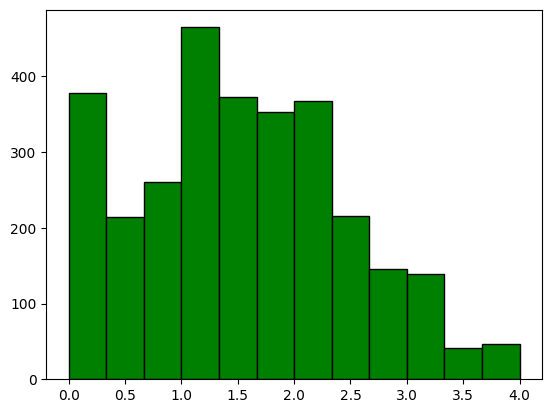
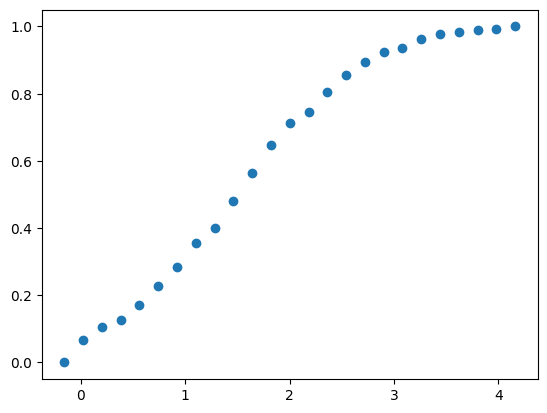
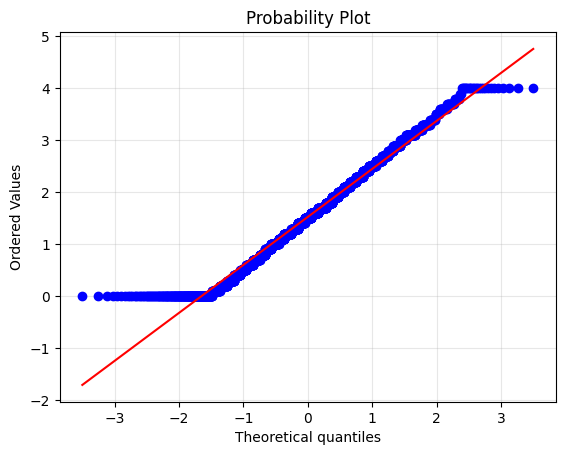

In [122]:
goals_1_2(data)

# Приведение данных к нормальным

In [126]:
def transformed(data):
    eps = 1e-8
    vls, _ = stats.boxcox(eps + data)
    return vls
    

trans_data = transformed(data)
print(len(data), len(trans_data))

3000 3000


# Пункты I-II для нормализованных данных


,exploring,result
0,mean,0.222867
1,var,1.016278
2,mod,-2.474696
3,med,0.440551
4,"quantiles of level 0.25, 0.5, 0.75","(-0.21338435872316, 0.44055085729383253, 0.9284436683415915)"
5,exc_kurt,1.185351
6,asymm,-1.197699
7,iqr,1.141828
8,histogram,
9,emp_dist,

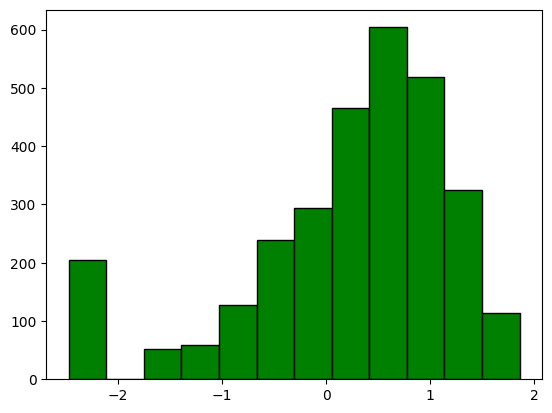
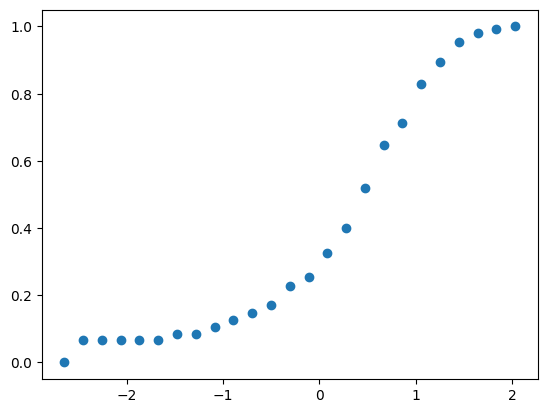
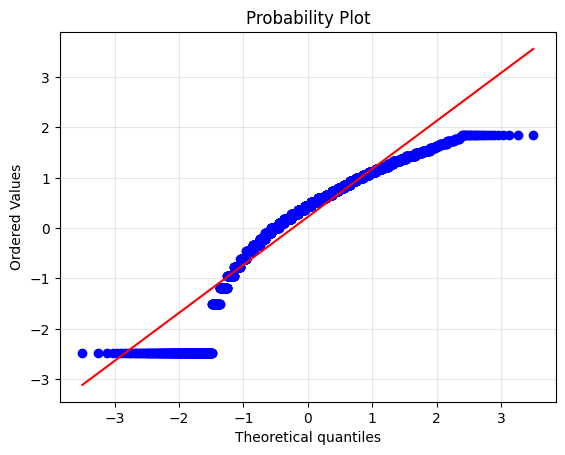

In [127]:
goals_1_2(trans_data)

# Пункт IV

In [88]:
grouped = dataset.groupby('School_Grade')[col_name]

print(grouped.mean())
print(grouped.var())

School_Grade
10th    1.453183
11th    1.512317
12th    1.520227
7th     1.554125
8th     1.538589
9th     1.569392
Name: Time_on_Gaming, dtype: float64
School_Grade
10th    0.861384
11th    0.787609
12th    0.943851
7th     0.776682
8th     0.964953
9th     0.879880
Name: Time_on_Gaming, dtype: float64


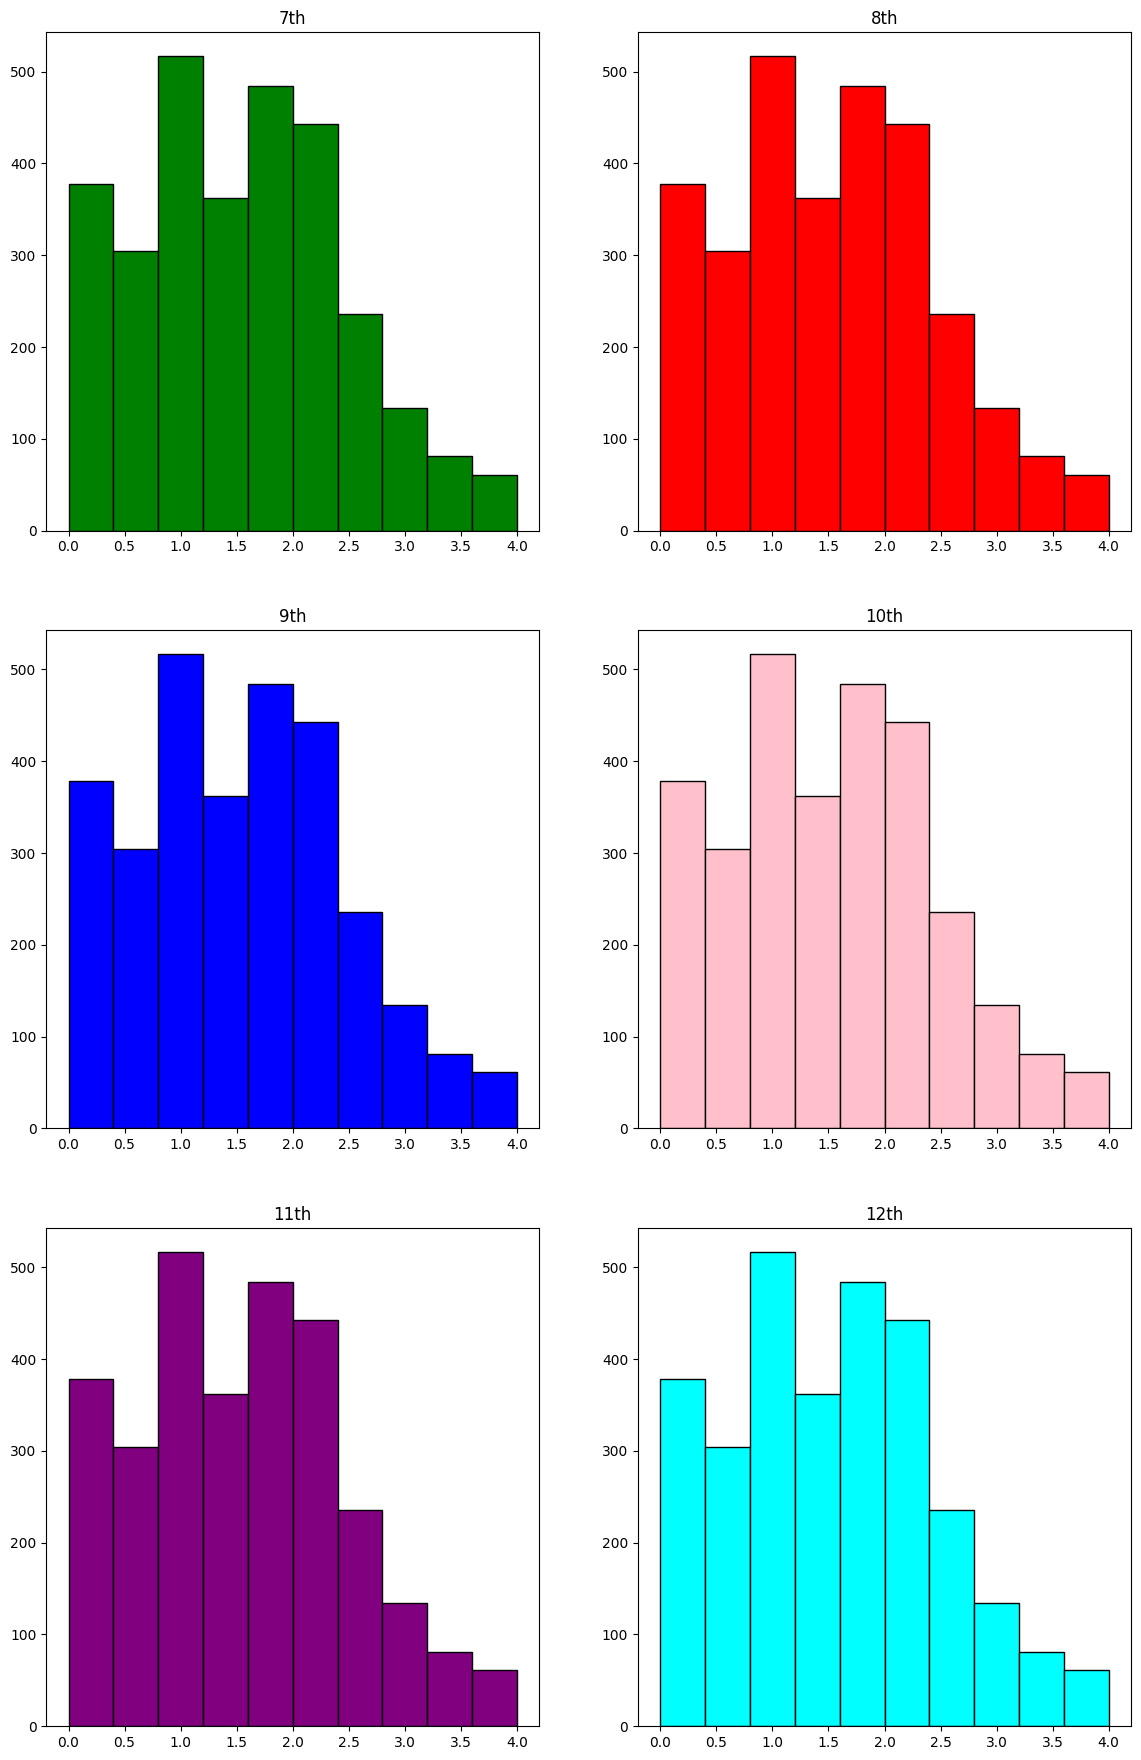

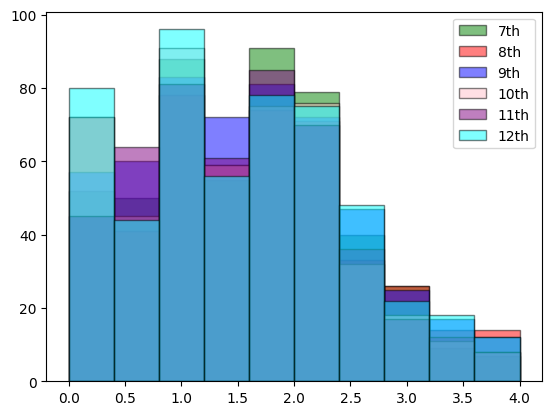

In [117]:
group_dict = grouped.apply(np.array).to_dict()
fig, axes = plt.subplots(3, 2, figsize = (14, 22))
axes = axes.flatten()
colors = ['green', 'red', 'blue', 'pink', 'purple', 'cyan']



ikv = [(i, kv[0], kv[1]) for i, kv in 
        enumerate(sorted(group_dict.items(), key = lambda x:int(x[0][:-2]))) ]

for i, k, v in ikv:
    axes[i].set_title(k)
    axes[i].hist(data, edgecolor='black', color=colors[i])

fig, ax = plt.subplots()
for i, k, v in ikv:
    ax.hist(v, color=colors[i], edgecolor='black', alpha=0.5, label=k)
ax.legend()
plt.show()





## IV.
Сгруппируйте данные по столбцу 'School_Grade'. 

1. На одном графике постройте гистограммы для каждой группы.
2. Рассчитайте среднее, дисперсию внутри каждой группы

## V.
После каждого пункта сделайте промежуточные выводы:
1. Опишите полученные числовые характеристики и графики
2. Являются ли данные нормальными
3. Эффект от обработки данных (удалось ли привести данные к нормальному виду)
4. Различия распределений внутри разных групп 'School_Grade'




In [63]:
N = 0
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
cols[N % 7]

'Daily_Usage_Hours'